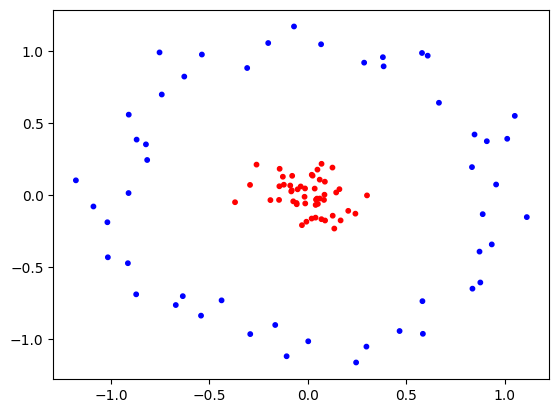

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets._samples_generator import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

X, y = make_circles(100, factor=0.1, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="bwr")

In [29]:
zero_one_colourmap = ListedColormap(("blue", "red"))


def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )

    plt.contourf(
        X1,
        X2,
        clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=zero_one_colourmap,
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=(zero_one_colourmap)(i),
            label=j,
        )
    plt.title("SVM Decision Boundary")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    return plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Linear kernel!


In [33]:
lin_svm = SVC(kernel="linear")
lin_svm.fit(X_train, y_train)
print(accuracy_score(y_train, lin_svm.predict(X_train)) * 100)
print(accuracy_score(y_test, lin_svm.predict(X_test)) * 100)

52.5
40.0


/tmp/ipykernel_57648/2749774726.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


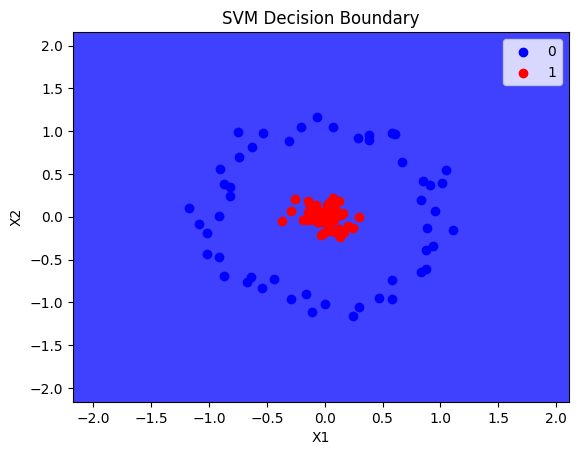

In [34]:
plot_decision_boundary(X, y, lin_svm)

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

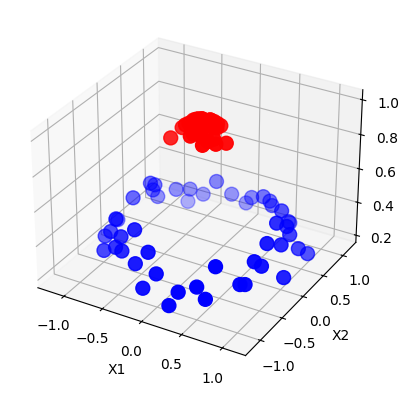

In [35]:
def plot_3d_plot(X, y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap="bwr")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    return ax


plot_3d_plot(X, y)

# rbf Kernel


In [58]:
rbf_svm = SVC(kernel="rbf", gamma=0.1, C=10)
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_test)
print(accuracy_score(y_train, rbf_svm.predict(X_train)) * 100)
print(accuracy_score(y_test, rbf_svm.predict(X_test)) * 100)

100.0
100.0


/tmp/ipykernel_57648/2749774726.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


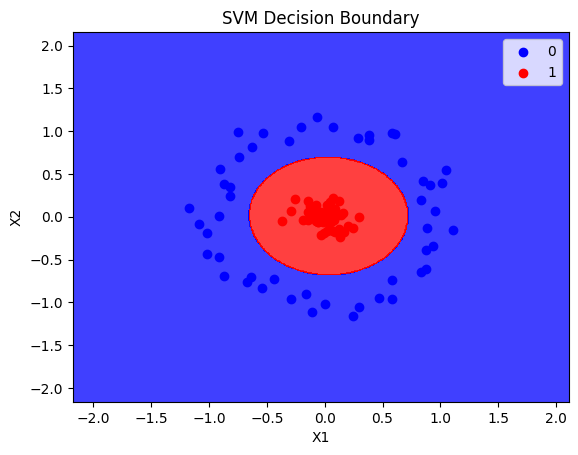

In [59]:
plot_decision_boundary(X, y, rbf_svm)

# Polynomial kernel


In [68]:
poly_svm = SVC(kernel="poly", degree=4, gamma=0.9, C=10)
poly_svm.fit(X_train, y_train)
print(accuracy_score(y_train, poly_svm.predict(X_train)) * 100)
print(accuracy_score(y_test, poly_svm.predict(X_test)) * 100)

100.0
100.0


/tmp/ipykernel_57648/2749774726.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


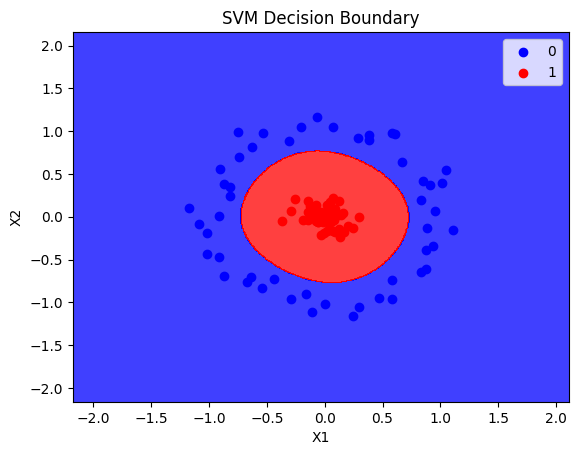

In [69]:
plot_decision_boundary(X, y, poly_svm)